In [1]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Continues Peak Problem

In [2]:
class ContinuousPeakProblem(mlrose.DiscreteOpt):
    def __init__(self, length):
        fitness_fn = mlrose.CustomFitness(continuous_peak_fitness)
        super().__init__(length=length, fitness_fn=fitness_fn, maximize=True, max_val=2)

def continuous_peak_fitness(state):
    fitness = 0
    for i in range(len(state) - 1):
        if state[i] == 1 and state[i + 1] == 0:
            fitness += 1
        elif state[i] == 0 and state[i + 1] == 1:
            fitness += 1
    return fitness

In [3]:
bit_lengths = range(10, 200, 20)
fitness_results = {'RHC': [], 'SA': [], 'GA': [], 'MIMIC': []}
dfs = []
for bit_length in bit_lengths:
    for algorithm_name in fitness_results.keys():
        if algorithm_name == 'RHC':
            _, best_fitness = mlrose.random_hill_climb(ContinuousPeakProblem(length=bit_length), max_attempts=100, max_iters=10, random_state=3)
        elif algorithm_name == 'SA':
            _, best_fitness = mlrose.simulated_annealing(ContinuousPeakProblem(length=bit_length), max_attempts=100, max_iters=10, random_state=3)
        elif algorithm_name == 'GA':
            _, best_fitness = mlrose.genetic_alg(ContinuousPeakProblem(length=bit_length), max_attempts=100, max_iters=10, random_state=3)
        elif algorithm_name == 'MIMIC':
            _, best_fitness = mlrose.mimic(ContinuousPeakProblem(length=bit_length), max_attempts=100, max_iters=10, random_state=3)        
        if best_fitness is not None:
            fitness_percentage = (best_fitness / (bit_length - 1)) * 100
            fitness_results[algorithm_name].append(fitness_percentage)
            df = pd.DataFrame({"Bit String Length": [bit_length], "Algorithm": [algorithm_name], "Fitness (%)": [fitness_percentage]})
            dfs.append(df)

final_df = pd.concat(dfs, ignore_index=True)
final_df

,Bit String Length,Algorithm,Fitness (%)
0,10,RHC,77.777778
1,10,SA,55.555556
2,10,GA,100.000000
3,10,MIMIC,100.000000
4,30,RHC,68.965517
5,30,SA,62.068966
6,30,GA,79.310345
7,30,MIMIC,96.551724
8,50,RHC,61.224490
9,50,SA,57.142857


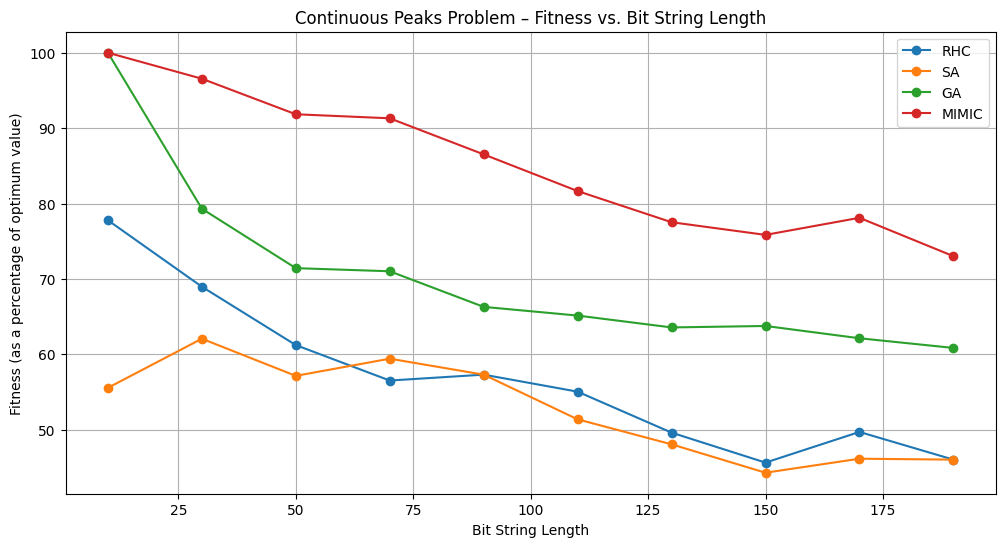

In [4]:
plt.figure(figsize=(12, 6))
for algo, fitness_values in fitness_results.items():
    plt.plot(bit_lengths, fitness_values, marker='o', label=algo)

plt.xlabel('Bit String Length')
plt.ylabel('Fitness (as a percentage of optimum value)')
plt.title('Continuous Peaks Problem – Fitness vs. Bit String Length')
plt.legend()
plt.grid(True)
plt.show()

# Flip Flop Problem

In [6]:
class FlipFlopProblem(mlrose.DiscreteOpt):
    def __init__(self, length):
        fitness_fn = mlrose.CustomFitness(flip_flop_fitness)
        super().__init__(length=length, fitness_fn=fitness_fn, maximize=True, max_val=2)

def flip_flop_fitness(state):
    fitness = 0
    for i in range(len(state) - 1):
        if state[i] != state[i + 1]:
            fitness += 1
    return fitness

In [8]:
bit_lengths = range(10, 200, 20)
fitness_results = {'RHC': [], 'SA': [], 'GA': [], 'MIMIC': []}
ffdf = []
for bit_length in bit_lengths:
    for algorithm_name in fitness_results.keys():
        if algorithm_name == 'RHC':
            _, best_fitness = mlrose.random_hill_climb(FlipFlopProblem(length=bit_length), max_attempts=100, max_iters=10, random_state=3)
        elif algorithm_name == 'SA':
            _, best_fitness = mlrose.simulated_annealing(FlipFlopProblem(length=bit_length), max_attempts=100, max_iters=10, random_state=3)
        elif algorithm_name == 'GA':
            _, best_fitness = mlrose.genetic_alg(FlipFlopProblem(length=bit_length), max_attempts=100, max_iters=10, random_state=3)
        elif algorithm_name == 'MIMIC':
            _, best_fitness = mlrose.mimic(FlipFlopProblem(length=bit_length), max_attempts=100, max_iters=10, random_state=3)
        
        if best_fitness is not None:
            fitness_percentage = (best_fitness / (bit_length - 1)) * 100
            fitness_results[algorithm_name].append(fitness_percentage)
            df = pd.DataFrame({"Bit String Length": [bit_length], "Algorithm": [algorithm_name], "Fitness (%)": [fitness_percentage]})
            ffdf.append(df)
        else:
            fitness_results[algorithm_name].append(0)

ff_df = pd.concat(ffdf, ignore_index=True)
ff_df

,Bit String Length,Algorithm,Fitness (%)
0,10,RHC,77.777778
1,10,SA,55.555556
2,10,GA,100.000000
3,10,MIMIC,100.000000
4,30,RHC,68.965517
5,30,SA,62.068966
6,30,GA,79.310345
7,30,MIMIC,96.551724
8,50,RHC,61.224490
9,50,SA,57.142857


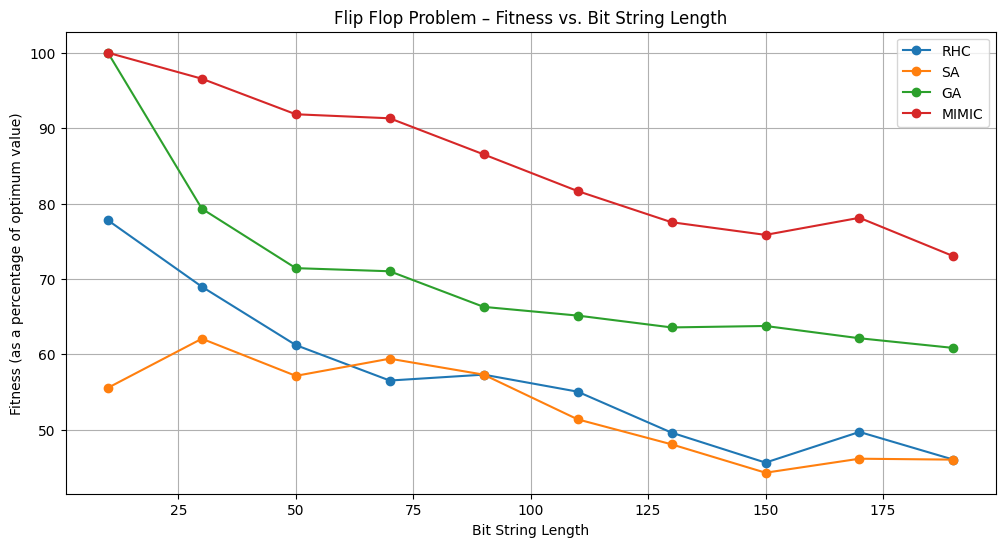

In [9]:
plt.figure(figsize=(12, 6))
for algo, fitness_values in fitness_results.items():
    plt.plot(bit_lengths, fitness_values, marker='o', label=algo)

plt.xlabel('Bit String Length')
plt.ylabel('Fitness (as a percentage of optimum value)')
plt.title('Flip Flop Problem – Fitness vs. Bit String Length')
plt.legend()
plt.grid(True)
plt.show()

# Traveling Salesman Problem

In [12]:
num_points_range = range(5, 100, 10)
fitness_results = {'RHC': [], 'SA': [], 'GA': [], 'MIMIC': []}
ts_df = []
for num_points in num_points_range:
    city_coordinates = np.random.rand(num_points, 2) * 1025
    fitness_fn = mlrose.TravellingSales(coords=city_coordinates)
    problem = mlrose.TSPOpt(length=num_points, fitness_fn=fitness_fn, maximize=False)
    for algorithm_name in fitness_results.keys():
        if algorithm_name == 'RHC':
            _, best_fitness = mlrose.random_hill_climb(problem, max_attempts=100, max_iters=10, random_state=3)
        elif algorithm_name == 'SA':
            _, best_fitness = mlrose.simulated_annealing(problem, max_attempts=100, max_iters=10, random_state=3)
        elif algorithm_name == 'GA':
            _, best_fitness = mlrose.genetic_alg(problem, max_attempts=100, max_iters=10, random_state=3)
        elif algorithm_name == 'MIMIC':
            _, best_fitness = mlrose.mimic(problem, max_attempts=100, max_iters=10, random_state=3)
        scaled_fitness = best_fitness / num_points
        fitness_results[algorithm_name].append(scaled_fitness)
    
    df = pd.DataFrame({"Number of Points": [num_points], "Algorithm": [algorithm_name], "Fitness": [scaled_fitness]})
    ts_df.append(df)

ts_df = pd.concat(ts_df, ignore_index=True)
ts_df

c:\Users\hira\AppData\Local\Programs\Python\Python310\lib\site-packages\mlrose\algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
c:\Users\hira\AppData\Local\Programs\Python\Python310\lib\site-packages\mlrose\algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
c:\Users\hira\AppData\Local\Programs\Python\Python310\lib\site-packages\mlrose\algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
c:\Users\hira\AppData\Local\Programs\Python\Python310\lib\site-packages\mlrose\algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
c:\Users\hira\AppData\Local\Programs\Python\Python310\lib\site-packages\mlrose\algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)
c:\Users\hira\AppData\Local\Programs\Python\Python310\lib\site-packages\mlrose\algorithms.py:311: RuntimeWarning: overflow encountered in ex

,Number of Points,Algorithm,Fitness
0,5,MIMIC,458.363912
1,15,MIMIC,302.072004
2,25,MIMIC,328.498929
3,35,MIMIC,430.069152
4,45,MIMIC,377.006359
5,55,MIMIC,473.239776
6,65,MIMIC,440.952158
7,75,MIMIC,493.251830
8,85,MIMIC,390.582346
9,95,MIMIC,471.804802


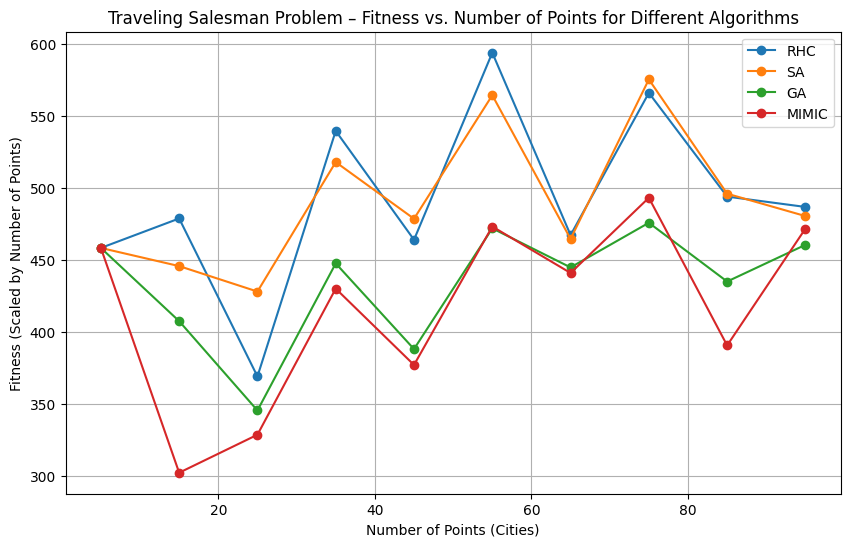

In [13]:
plt.figure(figsize=(10, 6))
for algo, fitness_values in fitness_results.items():
    plt.plot(num_points_range, fitness_values, marker='o', label=algo)
plt.xlabel('Number of Points (Cities)')
plt.ylabel('Fitness (Scaled by Number of Points)')
plt.title('Traveling Salesman Problem – Fitness vs. Number of Points for Different Algorithms')
plt.legend()
plt.grid(True)
plt.show()